In [42]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [ ]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

In [ ]:
df.describe()

## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

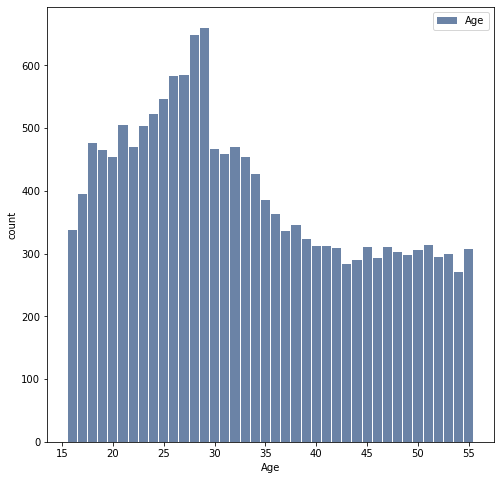

In [82]:
age_hist = thinkstats2.Hist(df["Age"], label='Age')
plt.figure(figsize=(8,8))
thinkplot.Hist(age_hist)
thinkplot.Config(xlabel='Age', ylabel='count')


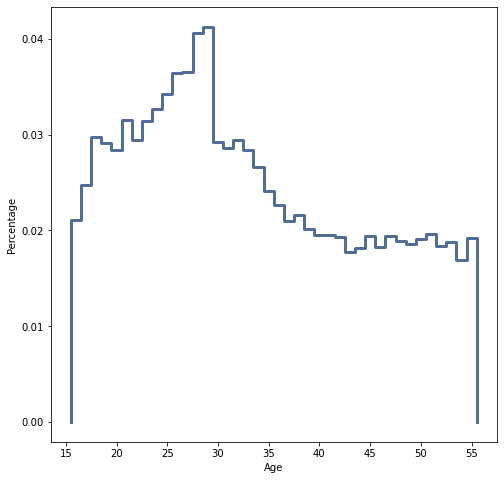

<Figure size 576x432 with 0 Axes>

In [83]:
age_pmf = thinkstats2.Pmf(df["Age"])
plt.figure(figsize=(8,8))
thinkplot.PrePlot()
thinkplot.Pmfs([age_pmf])
thinkplot.Show(xlabel="Age", ylabel="Percentage")

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [47]:
df_age_51 = df[df["Age"] ==51]
df_age_52up = df[df["Age"] >=52]

print("The fraction of people who are 51 years old is:", round(df_age_51.Age.count() / df.Age.count() * 100, 2),"%")
print("The fraction of people who are older that 51 is:", round(df_age_52up.Age.count() / df.Age.count() * 100, 2),"%")

The fraction of people who are 51 years old is: 1.96 %
The fraction of people who are older that 51 is: 7.32 %


##### What is the median age?

In [49]:
print("The median age is:", df["Age"].median())

The median age is: 31.0


##### Does the distribution of the sample data seem to mirror the working age population?

The distribution of the sample seems to reflect the working age population. Some started working at an early age, but majority of the working population are within the age range of 25 to 30 years old. The working population starts to decline in number from the age of 31, with about 9% of the population ages 51 and up.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

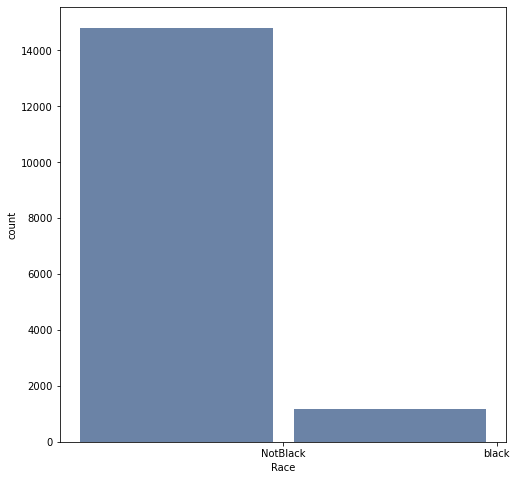

In [66]:
race_hist = thinkstats2.Hist(df["Race"])
plt.figure(figsize=(8,8))
thinkplot.Hist(race_hist)
thinkplot.Config(xlabel='Race', ylabel='count')
plt.show()

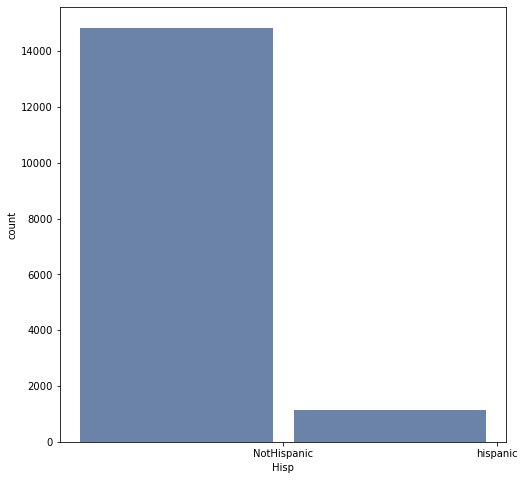

In [67]:
hisp_hist = thinkstats2.Hist(df["Hisp"])
plt.figure(figsize=(8,8))
thinkplot.Hist(hisp_hist)
thinkplot.Config(xlabel='Hisp', ylabel='count')
plt.show()

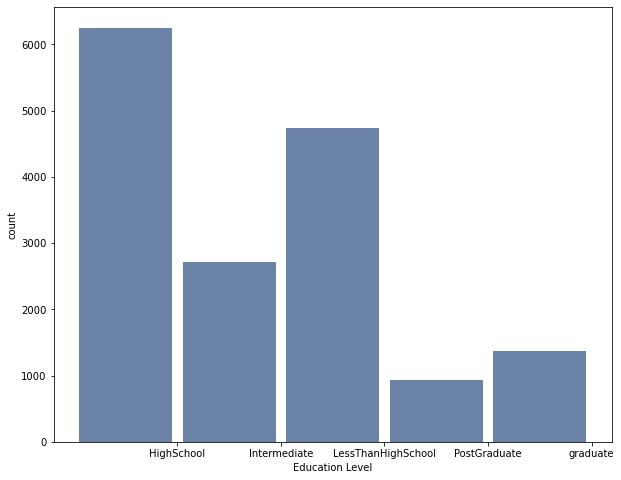

In [78]:
educ_hist = thinkstats2.Hist(df["Eduacation"])
plt.figure(figsize=(10,8))
thinkplot.Hist(educ_hist)
thinkplot.Config(xlabel='Education Level', ylabel='count')
plt.show()

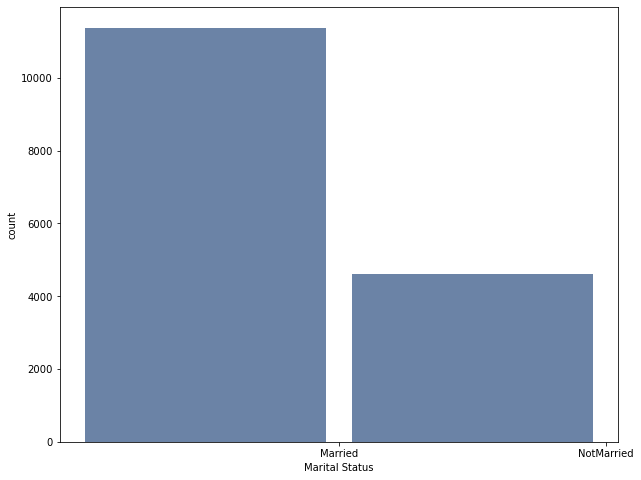

In [79]:
marital_status_hist = thinkstats2.Hist(df["MaritalStatus"])
plt.figure(figsize=(10,8))
thinkplot.Hist(marital_status_hist)
thinkplot.Config(xlabel='Marital Status', ylabel='count')
plt.show()

##### Demographic Conclusion


I do not think that the data appear to be a representative of the US population. Take a look at the Race and Hisp columns. Samples are only categorized or grouped by black and not black for race, and hispanic and not hispanic for hisp.

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

In [11]:
df.head()
Earnings_1974_hist = thinkstats2.Hist(df["Earnings_1974"])
Earnings_1975_hist = thinkstats2.Hist(df["Earnings_1975"])
Earnings_1978_hist = thinkstats2.Hist(df["Earnings_1978"])


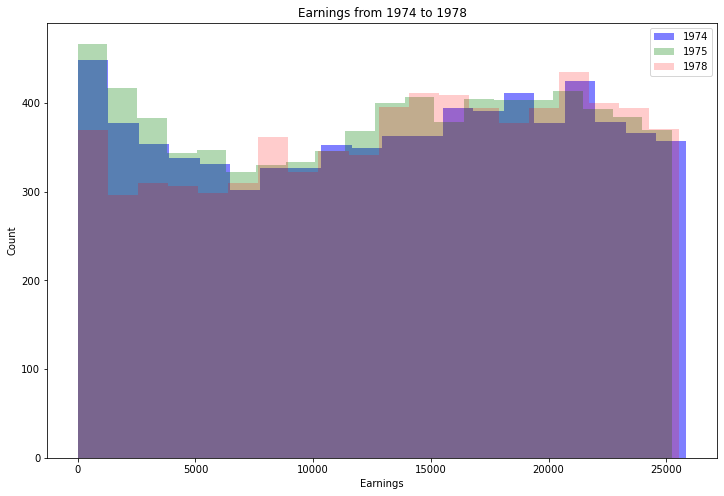

In [55]:
plt.figure(figsize=(12,8))
plt.hist(Earnings_1974_hist, label = "1974", color = "blue", bins = 20, alpha = 0.5)
plt.hist(Earnings_1975_hist, label = "1975", color = "green", bins = 20, alpha = 0.3)
plt.hist(Earnings_1978_hist, label = "1978", color = "red", bins = 20, alpha = 0.2)
plt.legend()
plt.title("Earnings from 1974 to 1978")
plt.xlabel("Earnings")
plt.ylabel("Count")
plt.show()

Based on the histogram, there's not much of a difference in the earnings from 1974 to 1978.

As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### What to Investigate Further


##### Histogram and PMF

In [18]:
#Create a hist, pmf, and stats for 1987 Earnings
#Note: if you don't round or otherwise create bins, the thinkstats plots for this will be weird
#That's because there are very few values that are the same, e.g. $14762.34, $15672.86, etc... 
#Every cent is a different value. 
#Seaborn plots will probably look better by default. 

c:\Users\rod\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


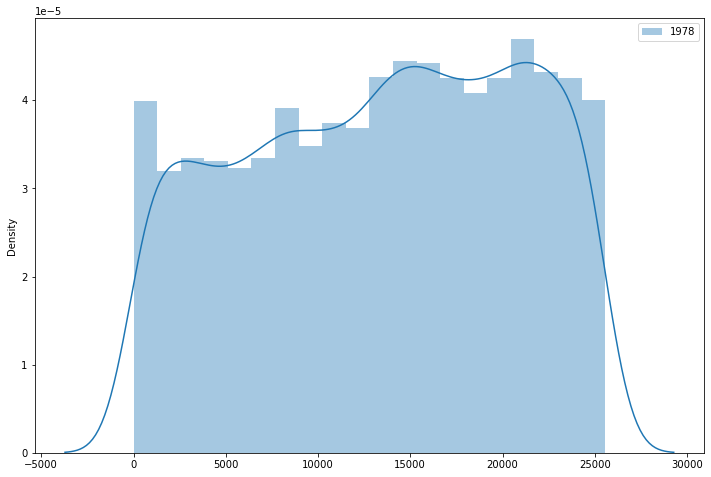

In [81]:
plt.figure(figsize=(12,8))
sns.distplot(Earnings_1978_hist, label = "1978")
plt.legend()
plt.show()

##### Differences in Median Income, and Theory on Why


##### Outliers

##### Outlier Conclusions
